# evaluomeR PCA

In [10]:
library("evaluomeR")
library("psych")


options(scipen=10)

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which

In [ ]:
# https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/
# https://www.r-data-scientist.com/es/blog/statistical-tests/kaiser-meyer-olkin-test/

# Table of contents
* [PCA](#pca)
* [Bartlett Sphericity Test](#bartlett)
    * [Bartlett Sphericity Test - Conclusiones](#bartlett-conclusion)
* [Kaiser-Meyer-Olkin Test](#kmo)
* [References](#references)

# PCA <a class="anchor" id="pca"></a>

In [38]:
# data("rnaMetrics")
seed = 13606
k.range=c(2,6)
set.seed(seed)
#input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/obo-119.csv"), header=TRUE, stringsAsFactors=FALSE)
input_df = as.data.frame(assay(rnaMetrics))
data = input_df[-1]

In [39]:
data.pca = princomp(data, cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

In [40]:
print(parte.pca)

   Comp.1    Comp.2 
98.723425  1.276575 


In [41]:
print(cumsum(parte.pca))

   Comp.1    Comp.2 
 98.72343 100.00000 


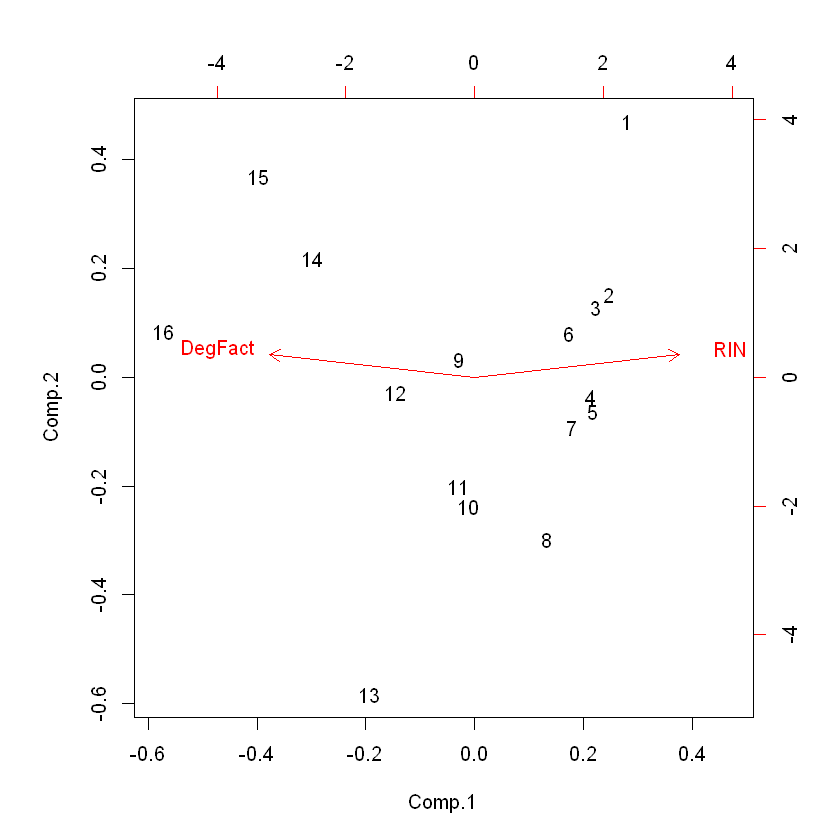

In [42]:
# Representación gráfica del PCA
biplot(data.pca)

# Bartlett Sphericity Test <a class="anchor" id="bartlett"></a>

In [43]:
R = cor(data)
#print(correlations)

In [44]:
print(cortest.bartlett(R, n = nrow(data)))

$chisq
[1] 40.33183

$p.value
[1] 0.0000000002142889

$df
[1] 1



## Bartlett Sphericity Test  - Conclusion<a class="anchor" id="bartlett-conclusion"></a>

Se rechaza la hipótesis nula al nivel del 5% (valor p=0<0.05). Por lo tanto, se puede realizar de manera eficiente un PCA en el conjunto de datos.

**Nota**:
La prueba de Bartlett tiene un gran inconveniente. Tiende a ser siempre estadísticamente significativo cuando aumenta el número de instancias n.

Algunas referencias aconsejan utilizar esta prueba solo si la relación n:p (número de instancias dividido entre el número de variables) es inferior a 5.

In [45]:
# Relación n:p es 4.10:
nrow(data)/ncol(data)

[1] 8

# Kaiser-Meyer-Olkin Test <a class="anchor" id="kmo"></a>


In [46]:
R = cor(data)
print(R)

               RIN    DegFact
RIN      1.0000000 -0.9744685
DegFact -0.9744685  1.0000000


La matriz de correlación parcial se puede obtener a partir de la matriz de correlación. Se calcula la inversa de esta última:

![equation](https://latex.codecogs.com/svg.image?R^{-1}=(v)_{ij})

In [48]:
invR <- solve(R)
print(invR)

             RIN  DegFact
RIN     19.83689 19.33042
DegFact 19.33042 19.83689


In [50]:
# Matriz de correlación parcial
A <- matrix(1, nrow(invR), ncol(invR))
for (i in 1:nrow(invR)){
  for (j in (i):ncol(invR)){
    # Sobre la diagonal
    A[i,j] <- -invR[i,j]/sqrt(invR[i,i]*invR[j,j])
    # Debajo de la diagonal
    A[j,i] <- A[i,j]
  }
}

colnames(A) <- colnames(data)
rownames(A) <- colnames(data)
print(A)

               RIN    DegFact
RIN     -1.0000000 -0.9744685
DegFact -0.9744685 -1.0000000


In [52]:
kmo.num <- sum(R^2) - sum(diag(R^2))
kmo.denom <- kmo.num + (sum(A^2) - sum(diag(A^2)))
kmo <- kmo.num/kmo.denom
print("KMO index:")
print(kmo)

[1] "KMO index:"
[1] 0.5


Si el índice KMO es alto (≈1), el PCA puede actuar de manera eficiente.
Si el índice KMO es bajo (≈0), el PCA no es relevante.

# References <a class="anchor" id="references"></a>

<a id="1">[1]</a>
https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/
